In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.stats import linregress
from scipy.integrate import solve_bvp

Text(0, 0.5, 'Muscle Mass')

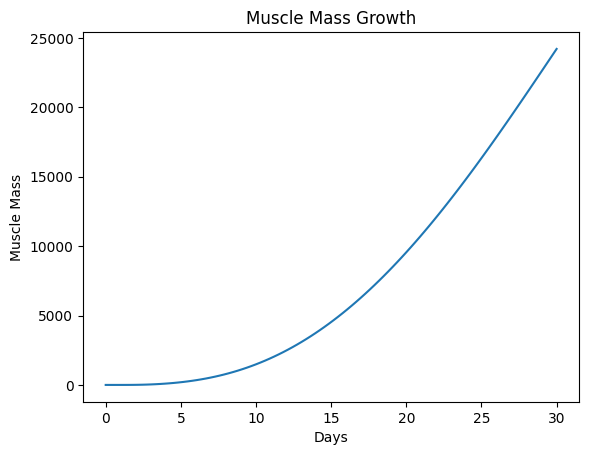

In [ ]:
beta = .2
eps = .3
rho = .5
alpha = .5
k = 2
j = 2

def ode(t, x): 
    return (beta * x[1] * x[2] + eps * x[3] * (rho * x[4] - alpha * x[5]), np.exp(-(t-1.6)**2), -t*(t-30), 1/(1+np.exp(-t)) - 1/2, k, j)

y0 = np.array([.01, 1/24, .3, 1, .05, .05])
t = np.linspace(0, 30, 100)

soln = solve_ivp(ode, t_span=(0, 30), y0=y0, t_eval=t)

plt.plot(t, soln.y[0])
plt.title("Muscle Mass Growth")
plt.xlabel("Days")
plt.ylabel("Muscle Mass")

In [3]:
beta = .2
eps = .3
rho = .5
alpha = .5
k = 2
j = 2

# x[0] = M, x[1] = P, x[2] = E, x[3] = S, x[4] = T, x[5] = C
def ode(t, x): 
    return np.array([beta * x[1] * x[2] + eps * x[3] * (rho * x[4] - alpha * x[5]), np.exp(-(t-1.6)**2), -t*(t-30), 1/(1+np.exp(-t)) - 1/2, np.full_like(t, k), np.full_like(t, j)])

# Boundary conditions on Exercise (1/48, 1/24), on Sleep (5/24, 1/2)
def bc(ya, yb):
    return np.array([ya[2] - 1/48, yb[2] - 1/24, ya[3] - 5/24, yb[3] - 1/2])

t = np.linspace(0, 30, 100)
y0 = np.ones((6, 100))

soln = solve_bvp(ode, bc, t, y0)

plt.plot(t, soln.y[0])
plt.title("Muscle Mass Growth")
plt.xlabel("Days")
plt.ylabel("Muscle Mass")

ValueError: `bc` return is expected to have shape (6,), but actually has (4,).

In [20]:
def testosterone(t):
    return k 

def cortisol(t):
    return j 

def exercise(t):
    return 1/100*np.sin(2*np.pi/30 * t + 2) + 1/50

def sleep(t):
    return 1/18*np.sin(2*np.pi/30 * t + 1) + 1/3

def protein(t):
    return .4*np.sin(2*np.pi/30 * t) + 1.2

def protein_synthesis(g):
    return np.exp(-(g/(1000*72)-1.6)**2)

Text(0, 0.5, 'Muscle Mass')

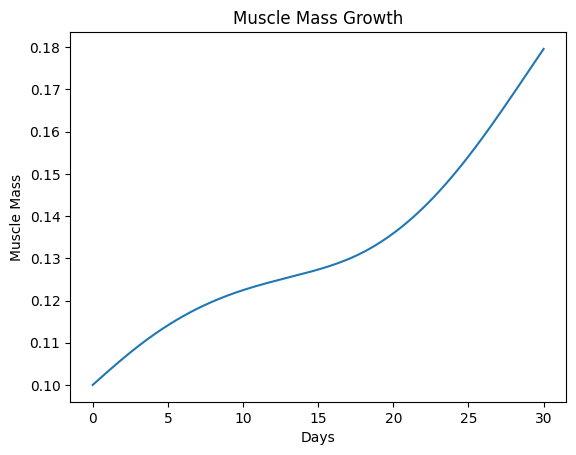

In [30]:
beta = 2000
eps = 5
rho = .5
alpha = .5
k = 1
j = 2
r = .01
K = 1

def ode(t, x): 
    x0 = x[0] # initial muscle mass

    logistic_growth = r * x0 * (1 - x0 / K)
    
    physical_factors = beta * protein_synthesis(protein(t)) * exercise(t) + eps * sleep(t) * (rho * testosterone(t) - alpha * cortisol(t))
    # I tweaked the model to have sleep add to hormones

    return [logistic_growth * physical_factors]

y0 = np.array([.1])
t = np.linspace(0, 30, 500)

soln = solve_ivp(ode, t_span=(0, 30), y0=y0, t_eval=t)

plt.plot(t, soln.y[0])
plt.title("Muscle Mass Growth")
plt.xlabel("Days")
plt.ylabel("Muscle Mass")